# Difference b/w ( finding accuracy with & without train test split )

which is the accurate way ?

In [39]:
import pandas as pd
df = pd.read_csv('D:\\Data Science\\py-master\\ML\\5_one_hot_encoding\\Exercise\\carprices.csv')
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


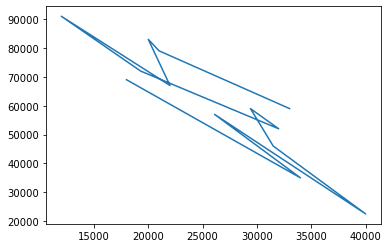

In [46]:
import matplotlib.pyplot as plt
plt.plot(df[['Sell Price($)']],df[['Mileage']])

In [6]:
dummies = pd.get_dummies(df[['Car Model']])
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
merge = pd.concat([df,dummies],axis = 1)
merge.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [24]:
# independent features
x = merge.drop(['Sell Price($)','Car Model_Mercedez Benz C class','Car Model'], axis=1)
x.head()

,Mileage,Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1


In [25]:
# dependent features
y = merge[['Sell Price($)']]
y.head()

,Sell Price($)
0,18000
1,34000
2,26100
3,40000
4,31500


In [30]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [33]:
reg.score(x,y)

0.9417050937281083

In [34]:
# accurate price without train - test split
reg.predict([[45000,4,0,0]])

array([[36991.31721061]])

In [47]:
# splitting the dataset from training test & testing set 

from sklearn.model_selection import train_test_split 
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 0)

In [54]:
reg1 = LinearRegression()
reg1.fit(x_train, y_train)

LinearRegression()

In [55]:
z = reg1.predict(x_test)
z

array([[26215.97345717],
       [19215.57878286],
       [29547.62978718]])

In [56]:
reg1.score(x_test, y_test)

0.47579864048039955

In [57]:
from sklearn.metrics import r2_score
score = r2_score(y_test,z)
score

0.47579864048039955

In [58]:
# accurate price with train test split
reg1.predict([[45000,4,0,0]])

array([[35482.61265574]])